<a href="https://colab.research.google.com/github/ArnavGhosh999/SCC/blob/main/Student_Performancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
data_filename = '/content/StudentsPerformance.csv'

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [129]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [130]:
#Data preprocessing and Cleaning (handling missing values)

In [131]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [132]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [107]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [108]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [109]:
#EDA

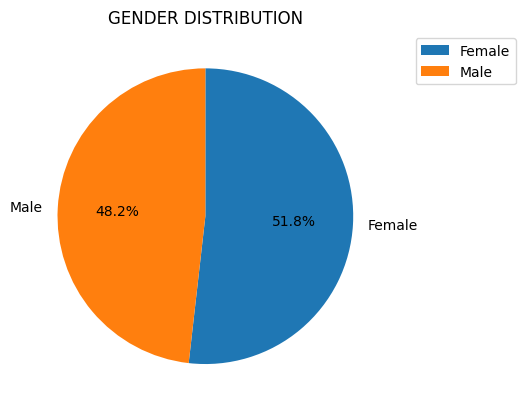

In [110]:
#How many are female v/s how many are males
import matplotlib.pyplot as plt
gender_counts = df['gender'].value_counts()
plt.title('GENDER DISTRIBUTION')
plt.pie(gender_counts, labels=['Female', 'Male'], autopct="%1.1f%%", counterclock=False, startangle=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [111]:
# Group data by test preparation and gender

<ipython-input-112-1c2a808bf2f6>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  test_prep_gender_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=ax, startangle=90,


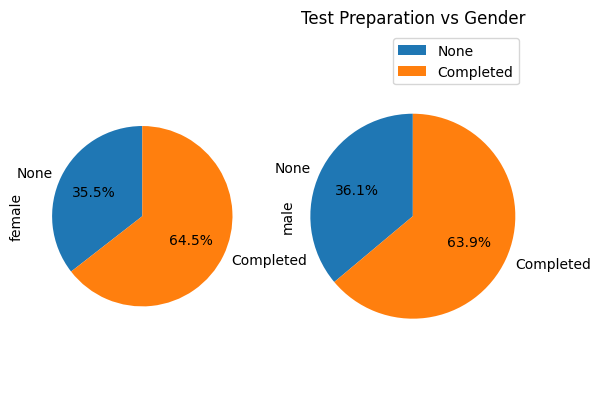

In [112]:
test_prep_gender_counts = df.groupby(['test preparation course', 'gender']).size().unstack()
fig, ax = plt.subplots()
test_prep_gender_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=ax, startangle=90,
                             labels=['None', 'Completed'], legend=False)
plt.legend(loc='upper right')
plt.title('Test Preparation vs Gender')
plt.axis('equal')
plt.yticks(rotation=0)
plt.show()

In [113]:
#Generating a bar graph showing the different races/ethnicity females and males belong to respectively

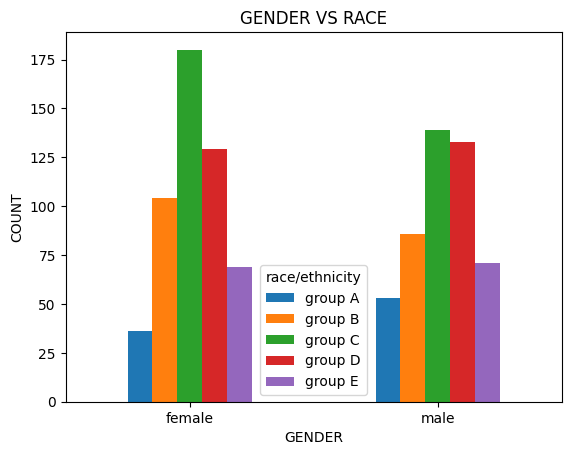

In [114]:
import matplotlib.pyplot as plt
gender_race = df.groupby(['gender', 'race/ethnicity']).size().unstack().plot(kind='bar')
plt.title('GENDER VS RACE')
plt.xlabel('GENDER')
plt.xticks(rotation=0)
plt.ylabel('COUNT')
plt.show()

In [115]:
#What is the parental level of education both the genders have got.

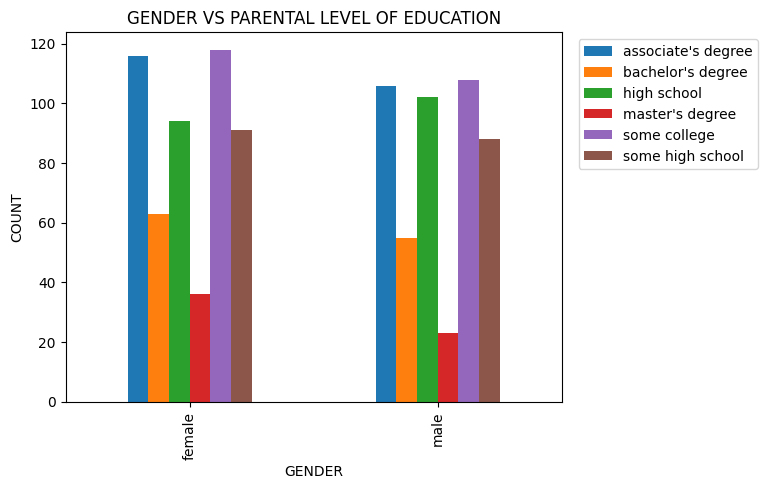

In [116]:
import matplotlib.pyplot as plt
gender_education = df.groupby(['gender', 'parental level of education']).size().unstack()
gender_education.plot(kind='bar')
plt.title('GENDER VS PARENTAL LEVEL OF EDUCATION')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.legend(bbox_to_anchor=(1.02, 0, 0.2, 1))
plt.show()

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

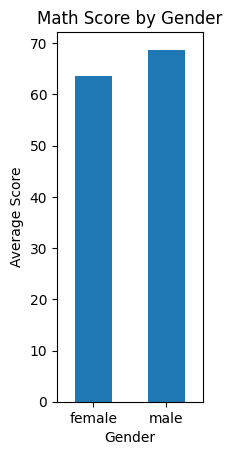

In [117]:
# Plot for gender v/s the test scores for maths, reading, writing

gender_math = df.groupby('gender')['math score'].mean()
ax1 = plt.subplot(1, 3, 1)
gender_math.plot(kind='bar', ax=ax1)
ax1.set_title('Math Score by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Average Score')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

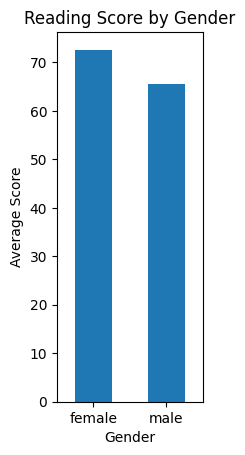

In [118]:
gender_reading = df.groupby('gender')['reading score'].mean()
ax2 = plt.subplot(1, 3, 2)
gender_reading.plot(kind='bar', ax=ax2)
ax2.set_title('Reading Score by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Average Score')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

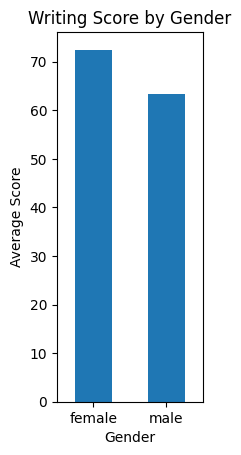

In [119]:
gender_writing = df.groupby('gender')['writing score'].mean()
ax3 = plt.subplot(1, 3, 3)
gender_writing.plot(kind='bar', ax=ax3)
ax3.set_title('Writing Score by Gender')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Average Score')
plt.xticks(rotation=0)

In [120]:
#KNN Classification

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['math score', 'reading score', 'writing score']]
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Classifier:", accuracy*100)

Accuracy of KNN Classifier: 87.0


In [122]:
#Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy*100)

Accuracy of Logistic Regression: 89.5


In [124]:
#StandardScalar to increase accuracy

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled_knn = knn_scaled.predict(X_test_scaled)
accuracy_knn_scaled = accuracy_score(y_test, y_pred_scaled_knn)
print("Accuracy of KNN Classifier after scaling:", accuracy_knn_scaled*100)

Accuracy of KNN Classifier after scaling: 86.0


In [137]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled_lr = model_scaled.predict(X_test_scaled)
accuracy_lr_scaled = accuracy_score(y_test, y_pred_scaled_lr)
print("Accuracy of Logistic Regression after scaling:", accuracy_lr_scaled*100)

Accuracy of Logistic Regression after scaling: 89.5
